In [76]:
from sklearn.datasets import make_moons

In [77]:
X, y = make_moons(n_samples=1000, random_state=42, noise=0.08)

In [78]:
X.shape

(1000, 2)

In [79]:
y.shape

(1000,)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
import torch

In [83]:
X_train, X_test, y_train, y_test = torch.from_numpy(X_train).type(torch.float), torch.from_numpy(X_test).type(torch.float), torch.from_numpy(y_train).type(torch.float), torch.from_numpy(y_test).type(torch.float)

In [84]:
X_train.shape

torch.Size([800, 2])

In [85]:
y_train.shape

torch.Size([800])

In [86]:
# visualizing dataset
import matplotlib.pyplot as plt

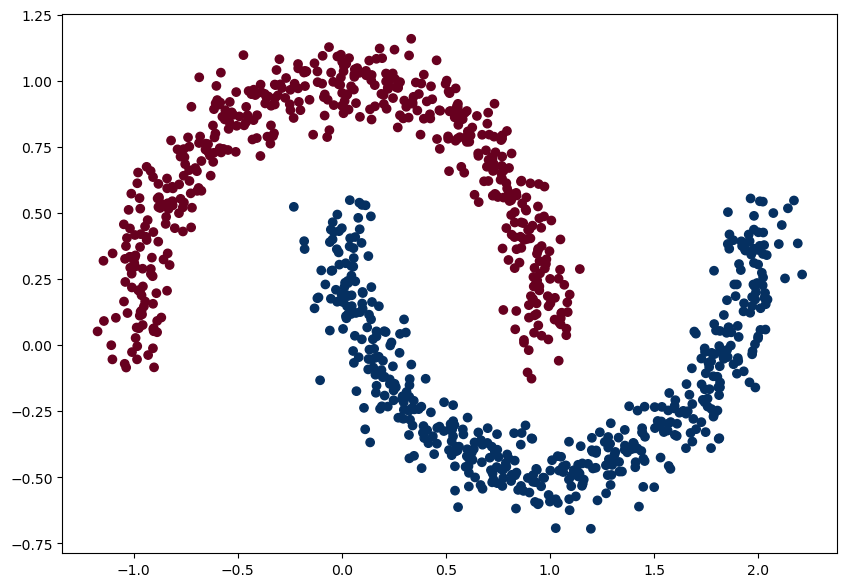

In [87]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [88]:
from torch import nn

In [89]:
class MoonDetector(nn.Module):
    
    def __init__(self, input_features, hidden_units, output_features):
        super().__init__()
        self.layer1 = nn.Linear(in_features=input_features, out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units, out_features=output_features)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


In [90]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [91]:
model = MoonDetector(2, 20, 1).to(device)
model

MoonDetector(
  (layer1): Linear(in_features=2, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)

In [92]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [98]:
from torchmetrics import Accuracy
acc_fn = Accuracy(task='binary', num_classes=2).to(device)

In [101]:
epochs = 1000
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

for epoch in range(epochs):
    model.train()
    y_logits = model(X_train).squeeze()
    y_pred_probs = torch.sigmoid(y_logits)
    y_pred = torch.round(y_pred_probs)
    loss = loss_fn(y_logits, y_train)
    acc = acc_fn(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred_probs = torch.sigmoid(test_logits)
        test_preds = torch.round(test_pred_probs)
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = acc_fn(test_preds, y_test)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | train loss: {loss} | train acc: {acc} | test loss: {test_loss} | test acc: {test_acc}')
        

Epoch: 0 | train loss: 0.7005874514579773 | train acc: 0.4937500059604645 | test loss: 0.6895224452018738 | test acc: 0.5249999761581421
Epoch: 10 | train loss: 0.6362269520759583 | train acc: 0.7774999737739563 | test loss: 0.6270401477813721 | test acc: 0.7649999856948853
Epoch: 20 | train loss: 0.5746613144874573 | train acc: 0.7799999713897705 | test loss: 0.5653523802757263 | test acc: 0.7749999761581421
Epoch: 30 | train loss: 0.5104823708534241 | train acc: 0.7762500047683716 | test loss: 0.5014034509658813 | test acc: 0.800000011920929
Epoch: 40 | train loss: 0.4544523060321808 | train acc: 0.7912499904632568 | test loss: 0.44624778628349304 | test acc: 0.8050000071525574
Epoch: 50 | train loss: 0.4129894971847534 | train acc: 0.800000011920929 | test loss: 0.4050498902797699 | test acc: 0.800000011920929
Epoch: 60 | train loss: 0.3841753304004669 | train acc: 0.8037499785423279 | test loss: 0.37608131766319275 | test acc: 0.8199999928474426
Epoch: 70 | train loss: 0.3629422783

Epoch: 670 | train loss: 0.04153403267264366 | train acc: 0.9950000047683716 | test loss: 0.05669843405485153 | test acc: 0.9850000143051147
Epoch: 680 | train loss: 0.03984331339597702 | train acc: 0.9975000023841858 | test loss: 0.05486156418919563 | test acc: 0.9850000143051147
Epoch: 690 | train loss: 0.03825328126549721 | train acc: 0.9987499713897705 | test loss: 0.05312717333436012 | test acc: 0.9850000143051147
Epoch: 700 | train loss: 0.03675627335906029 | train acc: 0.9987499713897705 | test loss: 0.051480893045663834 | test acc: 0.9850000143051147
Epoch: 710 | train loss: 0.035346001386642456 | train acc: 0.9987499713897705 | test loss: 0.04993973672389984 | test acc: 0.9850000143051147
Epoch: 720 | train loss: 0.0340164452791214 | train acc: 0.9987499713897705 | test loss: 0.048496413975954056 | test acc: 0.9850000143051147
Epoch: 730 | train loss: 0.0327615886926651 | train acc: 0.9987499713897705 | test loss: 0.04713418334722519 | test acc: 0.9850000143051147
Epoch: 740 |

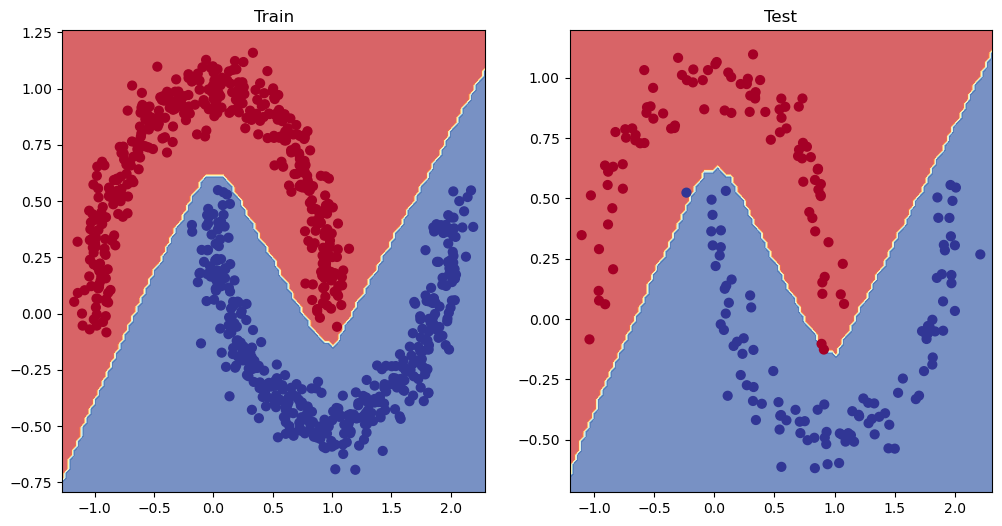

In [104]:
from helper_functions import plot_decision_boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)